# **Análisis Exploratorio de datos**

In [1]:
# Cargar las librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Cargar conjunto de datos**

In [2]:
df_amazon_delivery = pd.read_csv('../data/processed/amazon_delivery_limpios.csv')
df_amazon_delivery.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Order_Time,Pickup_Time,Order_Date
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,motorcycle,Urban,120,Clothing,11:30:00,11:45:00,2022-03-19
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,scooter,Metropolitian,165,Electronics,19:45:00,19:50:00,2022-03-25
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,motorcycle,Urban,130,Sports,08:30:00,08:45:00,2022-03-19
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,18:00:00,18:10:00,2022-04-05
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,scooter,Metropolitian,150,Toys,13:30:00,13:45:00,2022-03-26


**Exploración del conjuto de datos**

In [3]:
filas, columnas = df_amazon_delivery.shape
print(f'El conjunto de datos amazon_delivery_limpio.csv contiene:\nfilas:{filas:>10}\ncolumnas:{columnas:>7}')

El conjunto de datos amazon_delivery_limpio.csv contiene:
filas:     43644
columnas:     16


*Tipos de datos de cada columna*

In [4]:
df_amazon_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43644 entries, 0 to 43643
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43644 non-null  object 
 1   Agent_Age        43644 non-null  int64  
 2   Agent_Rating     43644 non-null  float64
 3   Store_Latitude   43644 non-null  float64
 4   Store_Longitude  43644 non-null  float64
 5   Drop_Latitude    43644 non-null  float64
 6   Drop_Longitude   43644 non-null  float64
 7   Weather          43644 non-null  object 
 8   Traffic          43644 non-null  object 
 9   Vehicle          43644 non-null  object 
 10  Area             43644 non-null  object 
 11  Delivery_Time    43644 non-null  int64  
 12  Category         43644 non-null  object 
 13  Order_Time       43644 non-null  object 
 14  Pickup_Time      43644 non-null  object 
 15  Order_Date       43644 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


Las columnas **Order_Time**, **Pickup_Time** se tienen que cambiar el tipo de object a time y **Order_Date** de object a datetime.

Las demás columna son correctos los tipos de datos.

**Transformación del tipo de datos de *Order_Time* y *Pickup_Time*.**

In [5]:
# Order_Time
df_amazon_delivery['Order_Time_TD'] = pd.to_timedelta(df_amazon_delivery['Order_Time'])

# Pickup_Time
df_amazon_delivery['Pickup_Time_TD'] = pd.to_timedelta(df_amazon_delivery['Pickup_Time'])

**Transformación del tipo de datos de *Order_Date*.**

In [6]:
# Order_Date
df_amazon_delivery['Order_Date'] = pd.to_datetime(df_amazon_delivery['Order_Date'], format='%Y-%m-%d', errors='coerce')
print('Tipo de Order_Date después de la primera conversion:', df_amazon_delivery['Order_Date'].dtype)

print('\nColumna con solo la fehca')
print(df_amazon_delivery['Order_Date'].head(3))

Tipo de Order_Date después de la primera conversion: datetime64[ns]

Columna con solo la fehca
0   2022-03-19
1   2022-03-25
2   2022-03-19
Name: Order_Date, dtype: datetime64[ns]


---

##### **Evaluar la eficiencia general de las entregas**

*Tiempo promedio de Entrega*

In [7]:
# Calcular el tiempo promedio de entregra (Delivery_Time)
promedio_delivery_time = np.mean(df_amazon_delivery['Delivery_Time'])

# Convertir el total de minutos a horas y minutos
horas = int(promedio_delivery_time // 60) # Obtiene la parte entera de las horas
minutos_restantes = promedio_delivery_time % 60 # Obtiene el resto de minutos

print(f'Promedio del tiempo de entrega (Delivery_Time): {promedio_delivery_time:.2f} minutos')
print(f'Que equivale a: {horas} horas y {minutos_restantes:.0f} minutos') # Redondea los minutos a un entero

Promedio del tiempo de entrega (Delivery_Time): 124.91 minutos
Que equivale a: 2 horas y 5 minutos


> El tiempo promedio de entre es de 2 horas y 5 minutos (2:05).

*Tiempo promedio de procesamiento del pedido*

In [8]:
# Calcular el tiempo promedio de procesamiento del pedido (Pickup_Time - Order_Time)
df_amazon_delivery['Order_Processing_Time'] = df_amazon_delivery['Pickup_Time_TD'] - df_amazon_delivery['Order_Time_TD']

# Si el resultado es negativo, significa que la recogida es "al día siguiente"
# Por lo tanto, le sumamos un día (24 horas)
one_day = pd.Timedelta(days=1)
df_amazon_delivery.loc[df_amazon_delivery['Order_Processing_Time'] < pd.Timedelta(0), 'Order_Processing_Time'] += one_day

promedio_order_processing_time = np.mean(df_amazon_delivery['Order_Processing_Time'])

promedio_en_segundos = promedio_order_processing_time.total_seconds()

# 2. Calcular los minutos enteros
minutos = int(promedio_en_segundos // 60)

# 3. Calcular los segundos restantes y redondearlos al entero más cercano
segundos = round(promedio_en_segundos % 60)

print(f'Promedio de Procesamiento de la orden del pedido (Order_Processing_Time): {promedio_order_processing_time}')
print(f'Promedio de Procesamiento de la orden del pedido: {minutos}:{segundos} minutos')

Promedio de Procesamiento de la orden del pedido (Order_Processing_Time): 0 days 00:09:59.446728072
Promedio de Procesamiento de la orden del pedido: 9:59 minutos


> El tiempo que tarda la tienda o el centro de distribución en preparar el pedido para su recolección es de 9:59 minutos.

*Porcentaje de Entregas a Tiempo*

In [9]:
# Calcular el porcentaje de entregas a tiempo (Número de entregas a tiempo / Número total de entregas * 100)

# Porcentaje de las entregas que queremos que se consideren "a tiempo"
# Encontrar el tiempo por debajo del cual está el 95% de las entregas
percentil_deseado = 95 

# Calcular el Percentil
umbral_calculado = df_amazon_delivery['Delivery_Time'].quantile(percentil_deseado / 100)

print(f'Basado en el {percentil_deseado}% de tus entregas históricas:')
print(f'El {percentil_deseado}º percentil del tiempo de entrega es: {umbral_calculado:.2f} minutos')

numero_entregas_a_tiempo = len(df_amazon_delivery[df_amazon_delivery['Delivery_Time'] <= umbral_calculado])
numero_total_entregas = len(df_amazon_delivery)

porcentaje_entregas_a_tiempo = (numero_entregas_a_tiempo / numero_total_entregas) * 100

print(f'\nUsando {umbral_calculado:.2f} minutos como umbral de "a tiempo":')
print(f'Número de entregas a tiempo: {numero_entregas_a_tiempo}')
print(f'Número total de entregas: {numero_total_entregas}')
print(f'Porcentaje de Entregas a Tiempo (con umbral basado en datos): {porcentaje_entregas_a_tiempo:.2f}%')

Basado en el 95% de tus entregas históricas:
El 95º percentil del tiempo de entrega es: 215.00 minutos

Usando 215.00 minutos como umbral de "a tiempo":
Número de entregas a tiempo: 41559
Número total de entregas: 43644
Porcentaje de Entregas a Tiempo (con umbral basado en datos): 95.22%


> El 95.22% de los clientes esperan (y reciben) su pedido en 215 minutos (3 horas y 35 minutos).

*Distancia promedio de entregas*

In [10]:
def haversine_vector(lat1, lon1, lat2, lon2):
    R = 6371.0
    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)
    delta_lat = np.radians(lat2 - lat1)
    delta_lon = np.radians(lon2 - lon1)

    a = np.sin(delta_lat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(delta_lon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Calcular en lote
df_amazon_delivery["Distance_km"] = haversine_vector(
    df_amazon_delivery["Store_Latitude"],
    df_amazon_delivery["Store_Longitude"],
    df_amazon_delivery["Drop_Latitude"],
    df_amazon_delivery["Drop_Longitude"]
)

In [11]:
df_amazon_delivery.head(5)

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Order_Time,Pickup_Time,Order_Date,Order_Time_TD,Pickup_Time_TD,Order_Processing_Time,Distance_km
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,motorcycle,Urban,120,Clothing,11:30:00,11:45:00,2022-03-19,0 days 11:30:00,0 days 11:45:00,0 days 00:15:00,2.051173
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,scooter,Metropolitian,165,Electronics,19:45:00,19:50:00,2022-03-25,0 days 19:45:00,0 days 19:50:00,0 days 00:05:00,14.088346
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,motorcycle,Urban,130,Sports,08:30:00,08:45:00,2022-03-19,0 days 08:30:00,0 days 08:45:00,0 days 00:15:00,1.083975
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,18:00:00,18:10:00,2022-04-05,0 days 18:00:00,0 days 18:10:00,0 days 00:10:00,5.457929
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,scooter,Metropolitian,150,Toys,13:30:00,13:45:00,2022-03-26,0 days 13:30:00,0 days 13:45:00,0 days 00:15:00,4.334621


In [12]:
promedio_distancia_entregas = np.mean(df_amazon_delivery['Distance_km'])
print(f'Distancia promedio de entregas: {promedio_distancia_entregas:.2f} km')

Distancia promedio de entregas: 10.37 km


> La distancia promedio de entregas es de 10.73 kilómetros

*Impacto del Clima y Tráfico en el Tiempo de Entregas*

In [13]:
# Formato de salida para la tabla dinamica (para el tiempo que sea más facil de leer)
df_copia = df_amazon_delivery[['Order_ID', 'Delivery_Time']].copy()

# Crear una función para convertir minutos a formato legible
def format_minutes_to_hh_mm_ss(minutes):
    if pd.isna(minutes): # Manejar valores NaN si existen
        return np.nan
    
    total_seconds = int(minutes * 60)  # Convertir a segundos totales y asegurar que sea entero
    hours = total_seconds // 3600
    minutes_remainder = (total_seconds % 3600) // 60
    seconds_remainder = total_seconds % 60
    
    # Formato "HH:MM:SS"
    # :02d asegura que los valores siempre tengan dos dígitos (ej., 5 se convierte en 05)
    return f"{hours}:{minutes_remainder:02d}:{seconds_remainder:02d}"

# --- Crear la nueva columna formateada en el DataFrame ---
df_copia['Delivery_Time_Formatted'] = df_copia['Delivery_Time'].apply(format_minutes_to_hh_mm_ss)

In [14]:
# Impacto del clima y trafico en el tiempo de entregas (tabla dinamica)
clima_trafico_tiempo_entrega = pd.pivot_table(df_amazon_delivery,
                                              values='Delivery_Time',
                                              index=['Weather', 'Traffic'],
                                              aggfunc='mean')

# Aplicar el formateo a la columna de resultados de la tabla dinámica
clima_trafico_tiempo_entrega['Delivery_Time_Formatted'] = \
    clima_trafico_tiempo_entrega['Delivery_Time'].apply(format_minutes_to_hh_mm_ss)

print("Tabla Dinámica Impacto del Clima y Tráfico en el Tiempo de Entregas")
clima_trafico_tiempo_entrega

Tabla Dinámica Impacto del Clima y Tráfico en el Tiempo de Entregas


Delivery_Time Delivery_Time_Formatted
Weather    Traffic                                       
Cloudy     High        138.900838                 2:18:54
           Jam         174.652232                 2:54:39
           Low         106.688986                 1:46:41
           Medium      136.680720                 2:16:40
Fog        High        134.856390                 2:14:51
           Jam         174.054054                 2:54:03
           Low         104.950475                 1:44:57
           Medium      132.230812                 2:12:13
Sandstorms High        131.856932                 2:11:51
           Jam         142.185776                 2:22:11
           Low          96.780159                 1:36:46
           Medium      132.783237                 2:12:46
Stormy     High        131.886555                 2:11:53
           Jam         142.232743                 2:22:13
           Low          98.627676                 1:38:37
           Medium      131.786435                 2:11:47
Sunny      High        110.011158                 1:50:00
           Jam         108.650986                 1:48:39
           Low         102.600917                 1:42:36
           Medium       96.076389                 1:36:04
Windy      High        128.680168                 2:08:40
           Jam         142.869584                 2:22:52
           Low          98.702198                 1:38:42
           Medium      130.675721                 2:10:40

> La tabla dinamica muestra los diferetes tiempos de entregas (tanto el minutos con en hora para facilitrar la leectura).

*Eficiencia por Tipo de Vehiculo*

In [15]:
# Agrupar por vehiculo para eficación 
tipo_vehiculo_promedio = pd.pivot_table(df_amazon_delivery,
                                        values='Delivery_Time',
                                        index=['Vehicle'],
                                        aggfunc='mean')

# Aplicar el formateo a la columna de resultados de la tabla dinámica
tipo_vehiculo_promedio['Delivery_Time_Formatted'] = \
    tipo_vehiculo_promedio['Delivery_Time'].apply(format_minutes_to_hh_mm_ss)

print("Tabla Dinámica del Tipo de Vehiculo en el Tiempo de Entregas")
tipo_vehiculo_promedio

Tabla Dinámica del Tipo de Vehiculo en el Tiempo de Entregas


,Delivery_Time,Delivery_Time_Formatted
Vehicle,,
bicycle,122.857143,2:02:51
motorcycle,131.030324,2:11:01
scooter,116.375385,1:56:22
van,116.074640,1:56:04


> La tabla dinámica muestra el tiempo promedio que se tarda en entregar el paquete, se muestra que el scooter y la van son los tipos de vehiculos que tiene un mejor tiempo promedio de entrega.

*Eficiencia por Área de Entrega*

In [16]:
# Agrupar pro tipo de área para eficiencia
tipo_area_promedio = pd.pivot_table(df_amazon_delivery,
                                    values='Delivery_Time',
                                    index=['Area'],
                                    aggfunc='mean')

tipo_area_promedio['Delivery_Time_Formatted'] = \
    tipo_area_promedio['Delivery_Time'].apply(format_minutes_to_hh_mm_ss)

print('Tabla Dinámica por Tipo de Área en el Tiempo de Entregas')
tipo_area_promedio

Tabla Dinámica por Tipo de Área en el Tiempo de Entregas


,Delivery_Time,Delivery_Time_Formatted
Area,,
Metropolitian,129.707626,2:09:42
Other,104.525110,1:44:31
Semi-Urban,238.552632,3:58:33
Urban,109.433871,1:49:26


> El tipo de área que tiene el mejor tiempo de entregas es 'Other'(área no registrado o omitida) con una hora y cuareta y cuatro minutos(1:44) seguida de Urban con una hora y cuareta y nueve minutos(1:49).

*Calificación del Agente y el Tiempo de Entregas*

In [17]:
agente_tiempo_entrega_promedio = pd.pivot_table(df_amazon_delivery,
                                                values='Delivery_Time',
                                                index=['Agent_Rating'],
                                                aggfunc='mean')

agente_tiempo_entrega_promedio['Delivery_Time_Formatted'] = \
    agente_tiempo_entrega_promedio['Delivery_Time'].apply(format_minutes_to_hh_mm_ss)

print('Tabla Dinámica por Agent_Rating en el Tiempo de Entregas')
agente_tiempo_entrega_promedio.sort_values(by='Agent_Rating',ascending=False)

Tabla Dinámica por Agent_Rating en el Tiempo de Entregas


,Delivery_Time,Delivery_Time_Formatted
Agent_Rating,,
6.0,111.642857,1:51:38
5.0,120.976727,2:00:58
4.9,114.763670,1:54:45
4.8,113.962927,1:53:57
4.7,115.208905,1:55:12
4.6,116.644524,1:56:38
4.5,112.076294,1:52:04
4.4,165.235856,2:45:14
4.3,165.139106,2:45:08


> La tabla dinámica muestra los Agent_Raating con mejor calificación tiene a tener el mejor tiempo de entrega.

----

##### **Identificar zonas geográficas y franjas horarias con mayores desafíos operativos**

*Calucalar el momento de llegada*

In [18]:
# Transformar Delivery_Time de minutos a una hora(formato hora)
df_amazon_delivery['Delivery_Duration'] = pd.to_timedelta(df_amazon_delivery['Delivery_Time'], unit='minutes')

# Fecha y hora de la recolección 
df_amazon_delivery['Pickup_Timestamp'] = pd.to_datetime(df_amazon_delivery['Order_Date'] + df_amazon_delivery['Pickup_Time_TD'])

# Fecha y hora en que se completo la entrega
df_amazon_delivery['Delivery_Completion_Timestamp'] = df_amazon_delivery['Pickup_Timestamp'] + df_amazon_delivery['Delivery_Duration']

df_amazon_delivery['Delivery_Hour'] = df_amazon_delivery['Delivery_Completion_Timestamp'].dt.hour
df_amazon_delivery['Delivery_Day_of_Week'] = df_amazon_delivery['Delivery_Completion_Timestamp'].dt.day_name()

df_amazon_delivery[['Order_ID', 'Order_Date', 'Order_Time', 'Pickup_Time', 'Pickup_Timestamp','Delivery_Duration' ,'Delivery_Completion_Timestamp', 'Delivery_Hour', 'Delivery_Day_of_Week']].head(5)

,Order_ID,Order_Date,Order_Time,Pickup_Time,Pickup_Timestamp,Delivery_Duration,Delivery_Completion_Timestamp,Delivery_Hour,Delivery_Day_of_Week
0,ialx566343618,2022-03-19,11:30:00,11:45:00,2022-03-19 11:45:00,0 days 02:00:00,2022-03-19 13:45:00,13,Saturday
1,akqg208421122,2022-03-25,19:45:00,19:50:00,2022-03-25 19:50:00,0 days 02:45:00,2022-03-25 22:35:00,22,Friday
2,njpu434582536,2022-03-19,08:30:00,08:45:00,2022-03-19 08:45:00,0 days 02:10:00,2022-03-19 10:55:00,10,Saturday
3,rjto796129700,2022-04-05,18:00:00,18:10:00,2022-04-05 18:10:00,0 days 01:45:00,2022-04-05 19:55:00,19,Tuesday
4,zguw716275638,2022-03-26,13:30:00,13:45:00,2022-03-26 13:45:00,0 days 02:30:00,2022-03-26 16:15:00,16,Saturday


> Delivery_Completion_Timestamp es mustra la fecha y la hora en que fue entregado el paquete(incluyte que día de la semana fue)

*Identificar la flanja horaria*

In [19]:
def get_time_slot(hour):
    if 6 <= hour < 9:
        return '06:00 - 08:59 (Mañana Pico)'
    elif 9 <= hour < 12:
        return '09:00 - 11:59 (Mañana Tardia)'
    elif 12 <= hour < 14:
        return '12:00 - 13:59 (Mediodia)'
    elif 14 <= hour < 17:
        return '14:00 - 16:59 (Tarde Pico)'
    elif 17 <= hour < 20:
        return '17:00 - 19:59 (Noche Temprana)'
    elif 20 <= hour < 23:
        return '20:00 - 22:59 (Noche Tardia)'
    else:
        return '23:00 - 05:59 (Madrugada)'

df_amazon_delivery['Delivery_Time_Slot'] = df_amazon_delivery['Delivery_Hour'].apply(get_time_slot)

df_amazon_delivery[['Order_ID', 
                    'Order_Date', 
                    'Order_Time', 
                    'Pickup_Time', 
                    'Pickup_Timestamp',
                    'Delivery_Duration',
                    'Delivery_Completion_Timestamp', 
                    'Delivery_Hour', 
                    'Delivery_Day_of_Week',
                    'Delivery_Time_Slot']].head(5)

,Order_ID,Order_Date,Order_Time,Pickup_Time,Pickup_Timestamp,Delivery_Duration,Delivery_Completion_Timestamp,Delivery_Hour,Delivery_Day_of_Week,Delivery_Time_Slot
0,ialx566343618,2022-03-19,11:30:00,11:45:00,2022-03-19 11:45:00,0 days 02:00:00,2022-03-19 13:45:00,13,Saturday,12:00 - 13:59 (Mediodia)
1,akqg208421122,2022-03-25,19:45:00,19:50:00,2022-03-25 19:50:00,0 days 02:45:00,2022-03-25 22:35:00,22,Friday,20:00 - 22:59 (Noche Tardia)
2,njpu434582536,2022-03-19,08:30:00,08:45:00,2022-03-19 08:45:00,0 days 02:10:00,2022-03-19 10:55:00,10,Saturday,09:00 - 11:59 (Mañana Tardia)
3,rjto796129700,2022-04-05,18:00:00,18:10:00,2022-04-05 18:10:00,0 days 01:45:00,2022-04-05 19:55:00,19,Tuesday,17:00 - 19:59 (Noche Temprana)
4,zguw716275638,2022-03-26,13:30:00,13:45:00,2022-03-26 13:45:00,0 days 02:30:00,2022-03-26 16:15:00,16,Saturday,14:00 - 16:59 (Tarde Pico)


In [20]:
franjas_horaria = pd.pivot_table(df_amazon_delivery,
                                values='Order_ID',
                                index=['Delivery_Time_Slot'],
                                aggfunc='count')

print('La Tabla Dinámica Muestra la Cantidad de Pedidos Entregados en las Diferentes Franjas Horarias')
franjas_horaria.sort_values(by='Order_ID', ascending=False)

La Tabla Dinámica Muestra la Cantidad de Pedidos Entregados en las Diferentes Franjas Horarias


,Order_ID
Delivery_Time_Slot,
23:00 - 05:59 (Madrugada),16962
20:00 - 22:59 (Noche Tardia),11929
17:00 - 19:59 (Noche Temprana),4847
09:00 - 11:59 (Mañana Tardia),4198
14:00 - 16:59 (Tarde Pico),2900
12:00 - 13:59 (Mediodia),2764
06:00 - 08:59 (Mañana Pico),44


> Las franjas horarias nos ayudana identificar cual es el horario en que se entrega más los pedidos.
>
> Se muestre que la Madrugas(23:00 - 5:59) es el horario con mayor cantidad de pedidos entregados con 16962, segudio de Noche Tardia(20:00 - 22:59) con 11929 pedidos entregados.

*Identificar Entregas Desafiantes*

In [21]:
umbral_entrega_desafiante_minutos = 215

print(f"Umbral de 'Entrega Desafiante' definido: {umbral_entrega_desafiante_minutos} minutos (basado en el 95.22% de entregas históricas).")

# Crea la columna booleana 'Is_Challenging_Delivery'
# Será True si el Delivery_Time es MAYOR que el umbral, indicando que es un desafío.
df_amazon_delivery['Is_Challenging_Delivery'] = df_amazon_delivery['Delivery_Time'] > umbral_entrega_desafiante_minutos

df_amazon_delivery[['Order_ID', 
                    'Order_Date', 
                    'Order_Time', 
                    'Pickup_Time', 
                    'Pickup_Timestamp',
                    'Delivery_Time',
                    'Delivery_Duration',
                    'Delivery_Completion_Timestamp',
                    'Delivery_Day_of_Week',
                    'Delivery_Time_Slot',
                    'Is_Challenging_Delivery']].head(3)

Umbral de 'Entrega Desafiante' definido: 215 minutos (basado en el 95.22% de entregas históricas).


,Order_ID,Order_Date,Order_Time,Pickup_Time,Pickup_Timestamp,Delivery_Time,Delivery_Duration,Delivery_Completion_Timestamp,Delivery_Day_of_Week,Delivery_Time_Slot,Is_Challenging_Delivery
0,ialx566343618,2022-03-19,11:30:00,11:45:00,2022-03-19 11:45:00,120,0 days 02:00:00,2022-03-19 13:45:00,Saturday,12:00 - 13:59 (Mediodia),False
1,akqg208421122,2022-03-25,19:45:00,19:50:00,2022-03-25 19:50:00,165,0 days 02:45:00,2022-03-25 22:35:00,Friday,20:00 - 22:59 (Noche Tardia),False
2,njpu434582536,2022-03-19,08:30:00,08:45:00,2022-03-19 08:45:00,130,0 days 02:10:00,2022-03-19 10:55:00,Saturday,09:00 - 11:59 (Mañana Tardia),False


In [22]:
entregas_desafiantes = df_amazon_delivery.groupby(['Is_Challenging_Delivery'])['Order_ID'].count()
print('Is_Challenging_Delivery nos mustra la cantidad de pedidos que son o no son desafiantes')
entregas_desafiantes

Is_Challenging_Delivery nos mustra la cantidad de pedidos que son o no son desafiantes


Is_Challenging_Delivery
False    41559
True      2085
Name: Order_ID, dtype: int64

> Se identifica que 41559 ordendes no fuereon desafiantes esto quiere decir que se entregaron en 215 minutos (3 horas y 35 minutos) o menos(se entregaron a tiempo) y que solo 2085 pedidos fueron desafiantes ya que se entregaron después de 215 minutos (3 horas y 35 minutos).

*Agregación para Identificar Zonas y Franjas Horarias con Desafios*

In [23]:
challenges_by_area_timeslot = df_amazon_delivery.groupby(['Area', 'Delivery_Time_Slot']).agg(
    Avg_Delivery_Time=('Delivery_Time', 'mean'),
    Num_Challenging_Deliveries=('Is_Challenging_Delivery', lambda x: x.sum()),
    Total_Deliveries=('Order_ID', 'count')
).reset_index()

challenges_by_area_timeslot['Percentage_Challenging'] = (
    challenges_by_area_timeslot['Num_Challenging_Deliveries'] / challenges_by_area_timeslot['Total_Deliveries']
) * 100

# También podemos ver el tiempo promedio por zona y franja horaria directamente
avg_time_by_area_timeslot = df_amazon_delivery.groupby(['Area', 'Delivery_Time_Slot']).agg(
    Avg_Delivery_Time_Minutes=('Delivery_Time', 'mean')
).reset_index()

# Para visualizar en un mapa, podrías agregar los datos por zonas más pequeñas si no tuvieras 'Area'
# Por ejemplo, agrupando por latitud/longitud redondeada para crear "bins" geográficos
df_amazon_delivery['Lat_Bin'] = df_amazon_delivery['Drop_Latitude'].round(2)
df_amazon_delivery['Lon_Bin'] = df_amazon_delivery['Drop_Longitude'].round(2)
challenges_by_geo_bin = df_amazon_delivery.groupby(['Lat_Bin', 'Lon_Bin']).agg(
    Avg_Delivery_Time=('Delivery_Time', 'mean'),
    Num_Challenging_Deliveries=('Is_Challenging_Delivery', lambda x: x.sum()),
    Total_Deliveries=('Order_ID', 'count')
).reset_index()

challenges_by_geo_bin['Percentage_Challenging'] = (
    challenges_by_geo_bin['Num_Challenging_Deliveries'] / challenges_by_geo_bin['Total_Deliveries']
) * 100

*Ëxportación de Datos para Tableau*

In [24]:
# Exportar el DataFrame completo con las nuevas columnas
df_amazon_delivery.to_csv('../data/processed/datos_entrega_procesados.csv', index=False)
# Exportar los datos agregados por área y franja horaria para gráficos específicos
challenges_by_area_timeslot.to_csv('../data/processed/desafios_por_area_y_hora.csv', index=False)
# Exportar datos agregados por bins geográficos para mapas de calor
challenges_by_geo_bin.to_csv('../data/processed/desafios_por_zona_geografica.csv', index=False)

**Link de los gráficos creados con Tableau**

[Amazon_Delivery_Parte1](https://public.tableau.com/app/profile/said.mariano/viz/Amazon_Delivery_Parte1/PromediodeTiempodeEntregaporFranjaHoraria)

[Amazon_Delivery_Parte2](https://public.tableau.com/app/profile/said.mariano/viz/Amazon_Delivery_Parte2/MapadeCalorCruzadoPromediodeTiempodeEntregaporreayFranjaHoraria)

---

##### **Reconocer el desempeño individual de los repartidores, destacando a los más eficientes y detectando áreas de mejora.**

*Promedio de Tiempo de Entrega por Calificación de Agente*

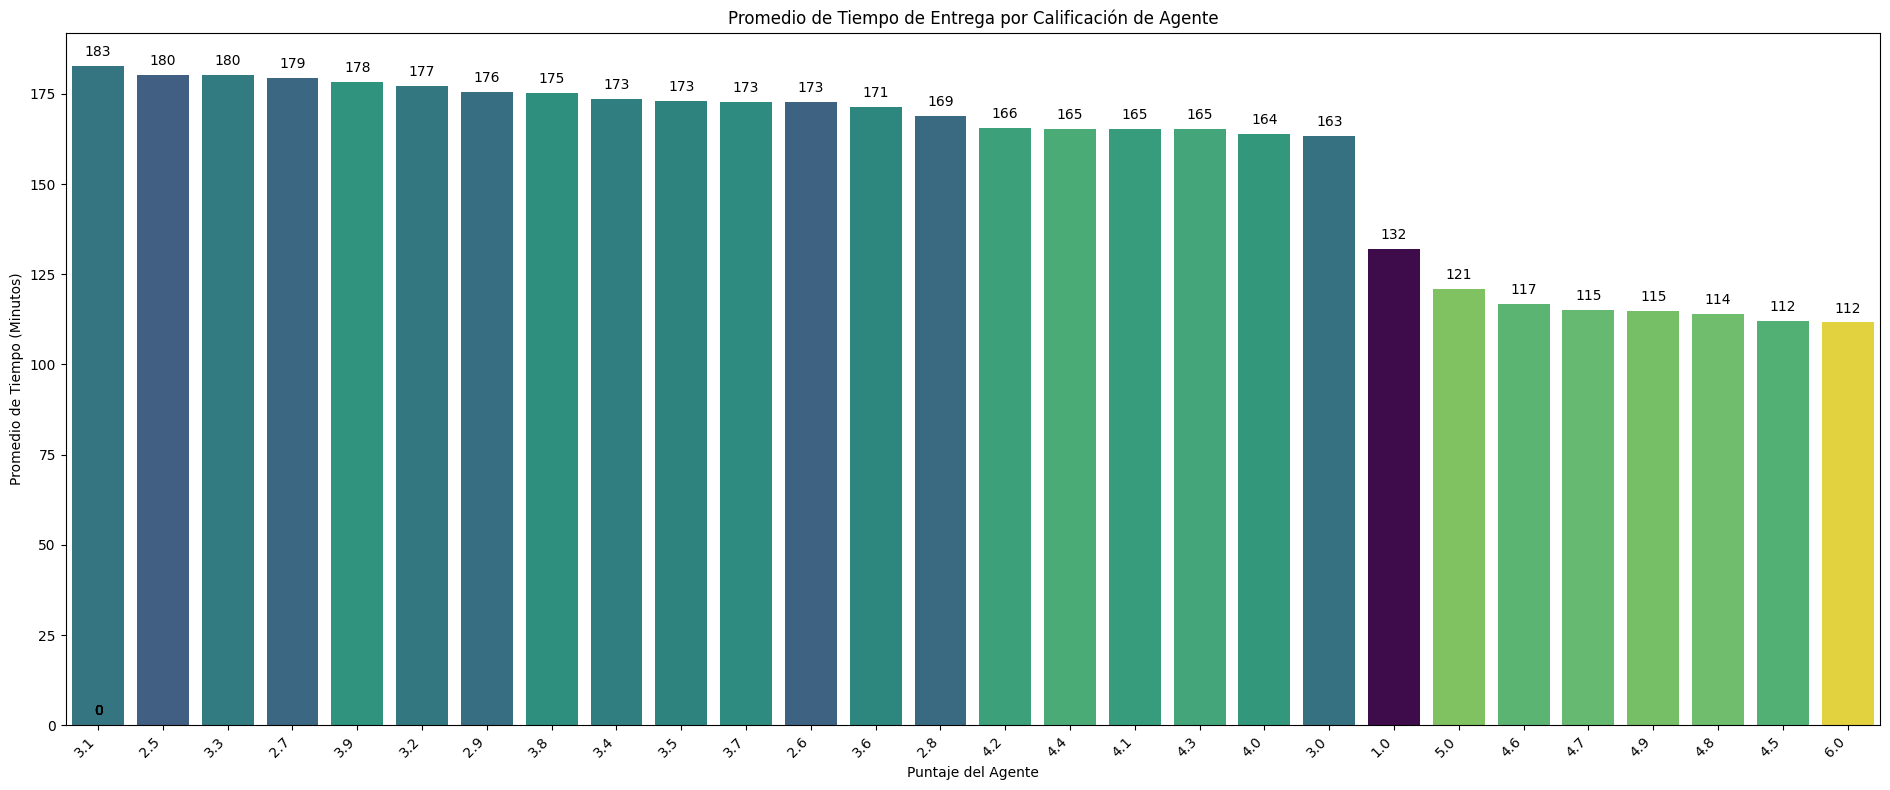

In [25]:
agente_tiempo_entrega_promedio_ordenado = agente_tiempo_entrega_promedio.sort_values(by='Delivery_Time', ascending=False)

plt.figure(figsize=(19,8))

# Obtener el orden de las categorías de Agent_Rating del índice de prueba_1
order_of_bars = agente_tiempo_entrega_promedio_ordenado.index

ax = sns.barplot(x='Agent_Rating', 
                 y='Delivery_Time',
                 data=agente_tiempo_entrega_promedio_ordenado.reset_index(),
                 order=order_of_bars,
                 hue='Agent_Rating',
                 palette='viridis') 

plt.title('Promedio de Tiempo de Entrega por Calificación de Agente')
plt.xlabel('Puntaje del Agente')
plt.ylabel('Promedio de Tiempo (Minutos)')

plt.xticks(rotation=45, ha='right')

# Agregar valors encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.00f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.legend().remove()
plt.tight_layout()
plt.show()

> Como anteriormente se habia visto en la 'Tabla Dinámica por Agent_Rating en el Tiempo de Entregas' los datos sugieren una clara relación entre la calificación del agente y el tiempo de entrega, con la exceptción de un agente con una calificación de 1 y un tiempo promedio de entrega de 132 minutos.

*Porcentaje de Entregas Desafiantes por Calificación de Agente*

In [26]:
porcentaje_entregas_desafientes_agente = pd.pivot_table(
    df_amazon_delivery,
    values=['Is_Challenging_Delivery', 'Order_ID'], 
    index='Agent_Rating',
    aggfunc={
        'Is_Challenging_Delivery': 'sum', 
        'Order_ID': 'count'               
    }
)

porcentaje_entregas_desafientes_agente['Ratio_Challenging_to_Total_Orders'] = \
    porcentaje_entregas_desafientes_agente['Is_Challenging_Delivery'] / porcentaje_entregas_desafientes_agente['Order_ID']

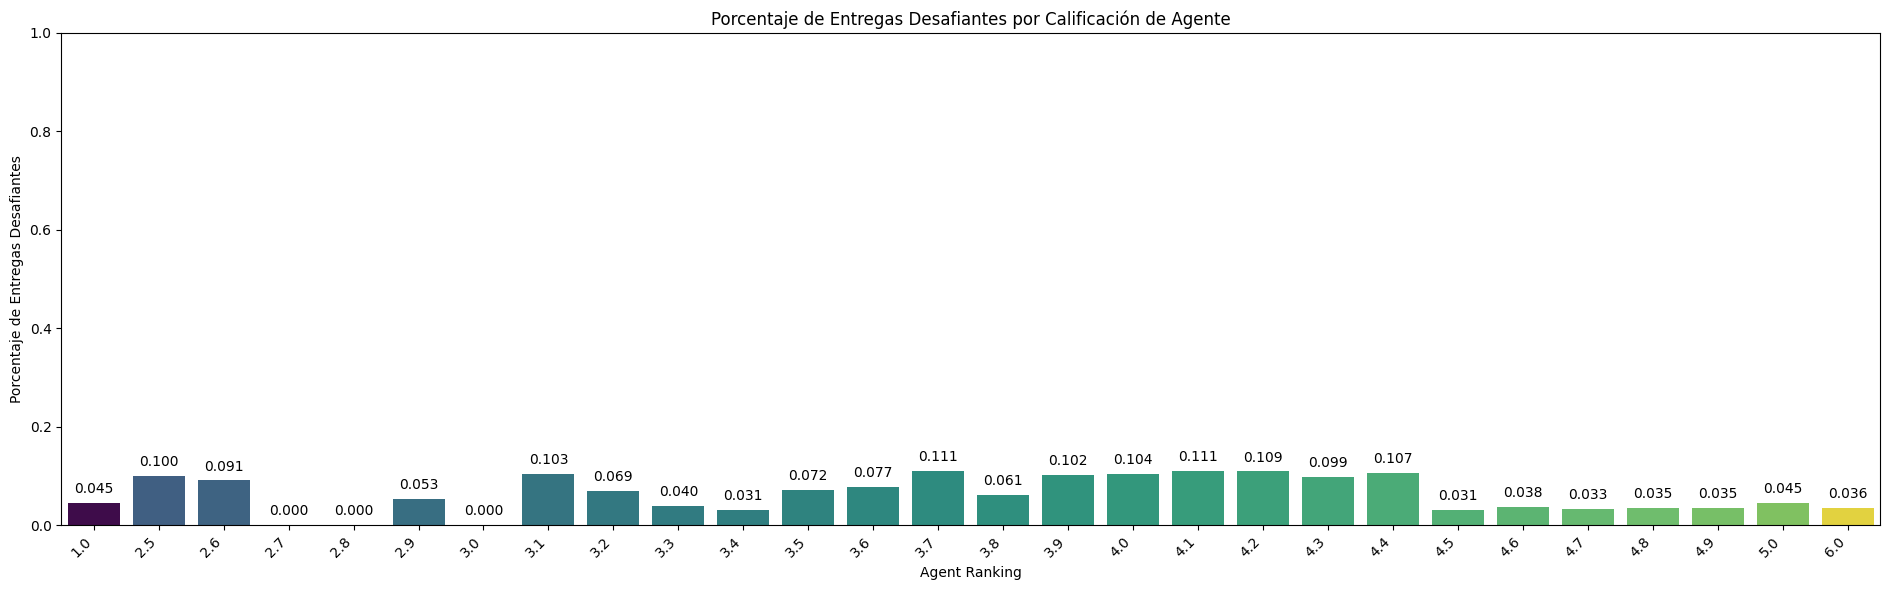

In [27]:
plt.figure(figsize=(19,6))


ax = sns.barplot(x='Agent_Rating',
                 y='Ratio_Challenging_to_Total_Orders',
                 data=porcentaje_entregas_desafientes_agente,
                 hue='Agent_Rating',
                 palette='viridis',
                 legend=False)

plt.title('Porcentaje de Entregas Desafiantes por Calificación de Agente')
plt.xlabel('Agent Ranking')
plt.ylabel('Porcentaje de Entregas Desafiantes')

plt.xticks(rotation=45, ha='right')
plt.ylim(0,1)

# Agregar valores encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

----

## ***Insights***

### **Evaluar la eficiencia general de las entregas**
- ***Eficiencia en el Procesamiento de Pedidos:*** Se ha identificado una notable eficiencia en la fase inicial del ciclo de entrega, con un tiempo promedio de procesamiento y recolección de pedidos de tan solo 9 minutos y 59 segundos. Esto indica una operación ágil desde la confirmación del pedido hasta su preparación para el despacho.

- ***Tiempo Promedio de Entrega General:*** El tiempo promedio general para completar una entrega es de 2 horas y 5 minutos. Esta métrica establece la expectativa actual para la totalidad del proceso logístico.

- ***Umbral de Entrega "A Tiempo":*** El 95.22% de las entregas históricas se completan en 215 minutos (3 horas y 35 minutos) o menos. Este umbral se establece como la base para el monitoreo de la puntualidad y la satisfacción del cliente, reflejando el rendimiento consistente en la gran mayoría de los casos.

- ***Distancia Promedio de Entrega:*** La distancia promedio recorrida por pedido es de 10.37 kilómetros. Este dato contextualiza los tiempos de entrega y es crucial para futuras optimizaciones de ruta.

- ***Impacto de Factores Externos:*** Las condiciones ambientales y de tráfico tienen un impacto significativo. Por ejemplo, en condiciones óptimas (día soleado y tráfico bajo), el tiempo promedio de entrega se reduce a 1 hora y 48 minutos, demostrando la influencia de estos factores en la variabilidad del servicio.

- ***Eficiencia por Tipo de Vehículo:*** Se observa que la elección del vehículo tiene una influencia menor en el tiempo de entrega, con una variación de solo 15 segundos entre el tipo de vehículo más rápido y el más lento (1 hora y 56 minutos frente a 2 horas y 11 minutos).

- ***Disparidad Geográfica en Tiempos de Entrega:*** Existe una diferencia sustancial en los tiempos de entrega según el área geográfica. Las áreas urbanas muestran una eficiencia superior con un promedio de 1 hora y 49 minutos, mientras que las áreas semi-urbanas presentan tiempos significativamente más largos, alcanzando 3 horas y 58 minutos. Esta divergencia subraya la necesidad de estrategias de optimización localizadas.

- ***Correlación entre Calificación del Agente y Eficiencia:*** Los datos sugieren una clara relación entre la calificación del agente y el rendimiento. Los agentes con una calificación de 4.5 o superior tienden a completar sus entregas en 2 horas o menos, destacando la importancia de la calidad y experiencia del personal de reparto en la eficiencia operativa.

### **Identificar zonas geográficas y franjas horarias con mayores desafíos operativos.**

* ***Desafíos Concentrados en Franjas Horarias de Alto Volumen:*** La Madrugada (23:00 - 05:59) se posiciona como la franja horaria más crítica. A pesar de manejar el mayor volumen de pedidos (16,962), registra un promedio de tiempo de entrega elevado de 139.8 minutos. Además, el 9.59% de estas entregas son desafiantes, siendo el porcentaje más alto entre todas las franjas horarias.

    * ***Otras franjas con porcentajes notables de entregas desafiantes incluyen:***

        * Tarde Pico (14:00 - 16:59): 3.55% de entregas desafiantes.

        * Noche Tardia (20:00 - 22:59): 2.31% de entregas desafiantes, afectando a un volumen considerable de 11,929 pedidos.

* ***El Rendimiento Varía Drásticamente por Tipo de Área Geográfica:***
    * Las Áreas Semi-Urbanas presentan el desafío geográfico más significativo, con un tiempo promedio de entrega de 238.6 minutos. Este promedio supera consistentemente el umbral de 215 minutos, indicando desafíos estructurales o logísticos en estas zonas.

    * En contraste, las Áreas Urbanas (109.4 minutos) y Metropolitanas (129.7 minutos) demuestran una eficiencia considerablemente mayor, con tiempos de entrega promedio que se mantienen bien por debajo del umbral establecido.

* ***Eficiencia Excepcional en Horas de Bajo Volumen:*** La franja horaria de Mañana Pico (06:00 - 08:59) destaca por su excepcional eficiencia, con un promedio de solo 19.4 minutos por entrega. No obstante, este periodo maneja el menor volumen de pedidos (44), lo que sugiere que esta eficiencia podría estar ligada directamente a la baja demanda.